In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels, num_classes=100)
test_labels = to_categorical(test_labels, num_classes=100)

169001437/169001437 [==============================] - 2s 0us/step


In [3]:
print(train_images)
print(test_images)

[[[[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.7647059  0.8039216  0.75686276]
   [0.83137256 0.8784314  0.8       ]
   [0.7137255  0.7607843  0.654902  ]]

  [[1.         1.         1.        ]
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   ...
   [0.6666667  0.6901961  0.5882353 ]
   [0.6313726  0.65882355 0.50980395]
   [0.57254905 0.6039216  0.44313726]]

  [[1.         1.         1.        ]
   [0.99607843 0.99607843 0.99607843]
   [1.         1.         1.        ]
   ...
   [0.7411765  0.78039217 0.6627451 ]
   [0.6509804  0.69803923 0.50980395]
   [0.4745098  0.52156866 0.34117648]]

  ...

  [[0.5803922  0.7254902  0.30980393]
   [0.5568628  0.7137255  0.22352941]
   [0.54901963 0.7019608  0.23529412]
   ...
   [0.11764706 0.06666667 0.00392157]
   [0.25490198 0.24313726 0.05882353]
   [0.29803923 0.3019608  0.07843138]]

  [[0.47843137 0.6156863  0.25882354]
   [0.4

In [4]:
print(test_labels)
print(train_labels)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(100, activation='softmax'))

In [6]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
704/704 [==============================] - 40s 56ms/step - loss: 4.0756 - accuracy: 0.0786 - val_loss: 3.7194 - val_accuracy: 0.1330
Epoch 2/5
704/704 [==============================] - 33s 47ms/step - loss: 3.4938 - accuracy: 0.1692 - val_loss: 3.3968 - val_accuracy: 0.1904
Epoch 3/5
704/704 [==============================] - 34s 48ms/step - loss: 3.1897 - accuracy: 0.2206 - val_loss: 3.1811 - val_accuracy: 0.2274
Epoch 4/5
704/704 [==============================] - 32s 46ms/step - loss: 2.9925 - accuracy: 0.2577 - val_loss: 2.9451 - val_accuracy: 0.2662
Epoch 5/5
704/704 [==============================] - 33s 47ms/step - loss: 2.8369 - accuracy: 0.2918 - val_loss: 2.8887 - val_accuracy: 0.2790


In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 3s 10ms/step - loss: 2.8729 - accuracy: 0.2876
Test accuracy: 0.28760001063346863


In [8]:
num_samples = 6
random_indices = np.random.choice(len(test_images), num_samples, replace=False)
sample_images = test_images[random_indices]
sample_labels = test_labels[random_indices]

predictions = model.predict(sample_images)

true_labels = [np.argmax(label) for label in sample_labels]
predicted_labels = [np.argmax(prediction) for prediction in predictions]

1/1 [==============================] - 0s 73ms/step


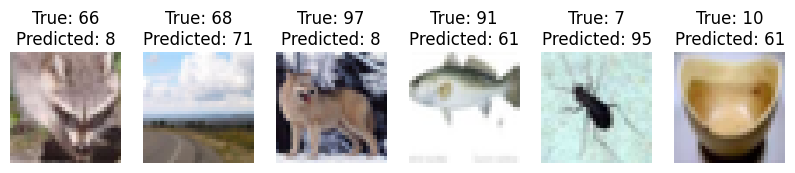

In [9]:
plt.figure(figsize=(10, 8))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(sample_images[i])
    plt.title(f'True: {true_labels[i]}\nPredicted: {predicted_labels[i]}')
    plt.axis('off')

plt.show()